In [58]:
import anndata

# Load the .h5ad file
realfile = '/home/hudaa/ACTIVA/realnew.h5ad'
activafile = '/home/hudaa/ACTIVA/ACTIVA-Generated/final-8385Generated.h5ad'
real = anndata.read_h5ad(realfile)
activa = anndata.read_h5ad(activafile)

# Access and print metadata
#print("Metadata:")
#print(activa.obs)

In [59]:
if activa.shape[0] != real.shape[0]:
    raise ValueError("Number of observations (rows) in 'activa' and 'real' must be the same.")

# Set row names of 'activa' to be the same as 'real'
activa.obs_names = real.obs_names


In [60]:
import pandas as pd

# Reading in the original dataset labels
ann68kpbmc = pd.read_csv("https://raw.githubusercontent.com/10XGenomics/single-cell-3prime-paper/master/pbmc68k_analysis/68k_pbmc_barcodes_annotation.tsv", sep='\t')


In [61]:
real_val_barcodes = real.obs_names.to_frame(index=False).rename(columns={real.obs_names.name: 'Barcodes'})['Barcodes'].tolist()
real_validation_celltype = ann68kpbmc[ann68kpbmc['barcodes'].isin(real_val_barcodes)].copy()

activa_val_barcodes = activa.obs_names.to_frame(index=False).rename(columns={activa.obs_names.name: 'Barcodes'})['Barcodes'].tolist()
activa_validation_celltype = ann68kpbmc[ann68kpbmc['barcodes'].isin(activa_val_barcodes)].copy()
#print(real.obs)

In [59]:

#print(real_val_barcodes)
#print(real_validation_celltype['barcodes'])

In [62]:
import numpy as np

# Assuming 'real' and 'activa' are your AnnData objects

# Generate dataset labels for the metadata
real_labs = np.full_like(real.obs_names, fill_value="Real (Test Set)")
activa_labs = np.full_like(activa.obs_names, fill_value="ACTIVA")


In [63]:

# Assuming 'real' and 'activa' are your AnnData objects
# Assuming 'real_labs' and 'activa_labs' are your generated dataset labels
# Assuming 'real_validation_celltype' and 'activa_validation_celltype' are your DataFrames

# Real data

# Adding dataset label to metadata
real.obs['dataset_label'] = pd.Categorical(real_labs)

# Adding Celltype to metadata
real.obs['celltype'] = pd.Categorical(real_validation_celltype['celltype'])

# ACTIVA data

# Adding dataset label to metadata
activa.obs['dataset_label'] = pd.Categorical(activa_labs)

# Adding Celltype to metadata
activa.obs['celltype'] = pd.Categorical(activa_validation_celltype['celltype'])


In [64]:
import scanpy as sc

# Assuming 'real' and 'activa' are your AnnData objects

# Variable Gene Selection
sc.pp.highly_variable_genes(real, n_top_genes=3000, flavor='cell_ranger', inplace=True)
sc.pp.highly_variable_genes(activa, n_top_genes=3000, flavor='cell_ranger', inplace=True)


In [65]:

var_names = activa.var_names.intersection(real.var_names)
activa = activa[:, var_names]
real = real[:, var_names]

In [66]:
sc.pp.pca(activa)
sc.pp.neighbors(activa)
sc.tl.leiden(activa)
sc.tl.umap(activa)

sc.pp.pca(real)
sc.pp.neighbors(real)
sc.tl.leiden(real)
sc.tl.umap(real)

/home/hudaa/.local/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/hudaa/.local/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


In [67]:
sc.tl.ingest(real, activa, obs='leiden')

/home/hudaa/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/home/hudaa/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


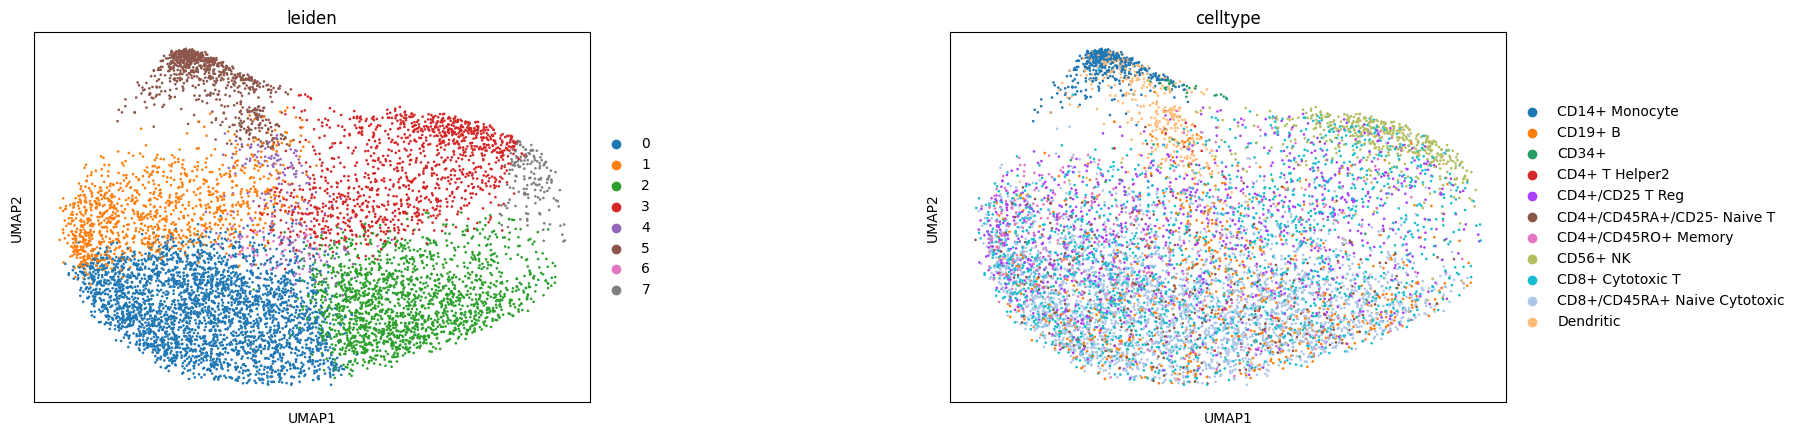

In [68]:
sc.pl.umap(real, color=['leiden', 'celltype'], wspace=0.5)

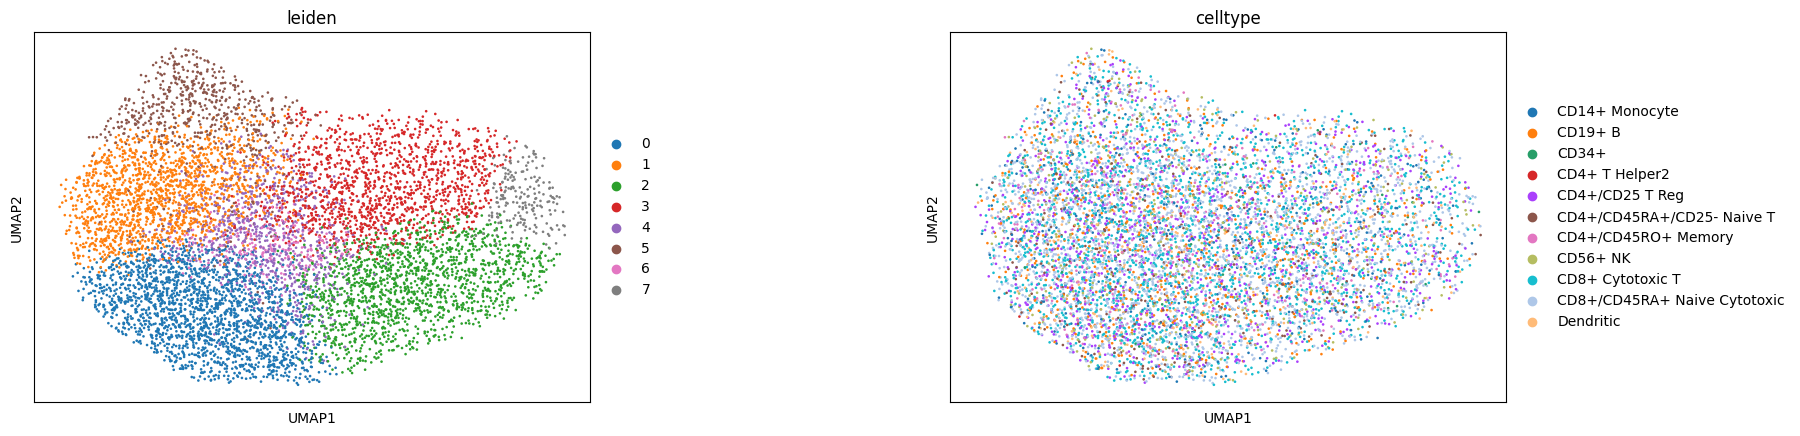

In [69]:
sc.pl.umap(activa, color=['leiden', 'celltype'], wspace=0.5)

In [70]:
real_concat = activa.concatenate(real, batch_categories=['activa', 'real'])

/tmp/ipykernel_42507/2283219664.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  real_concat = activa.concatenate(real, batch_categories=['activa', 'real'])


In [71]:
real_concat.obs.leiden = real_concat.obs.leiden.astype('category')
real_concat.obs.leiden.cat.reorder_categories(activa.obs.leiden.cat.categories, inplace=True)  # fix category ordering
real_concat.uns['leiden_colors'] = activa.uns['leiden_colors']  # fix category colors

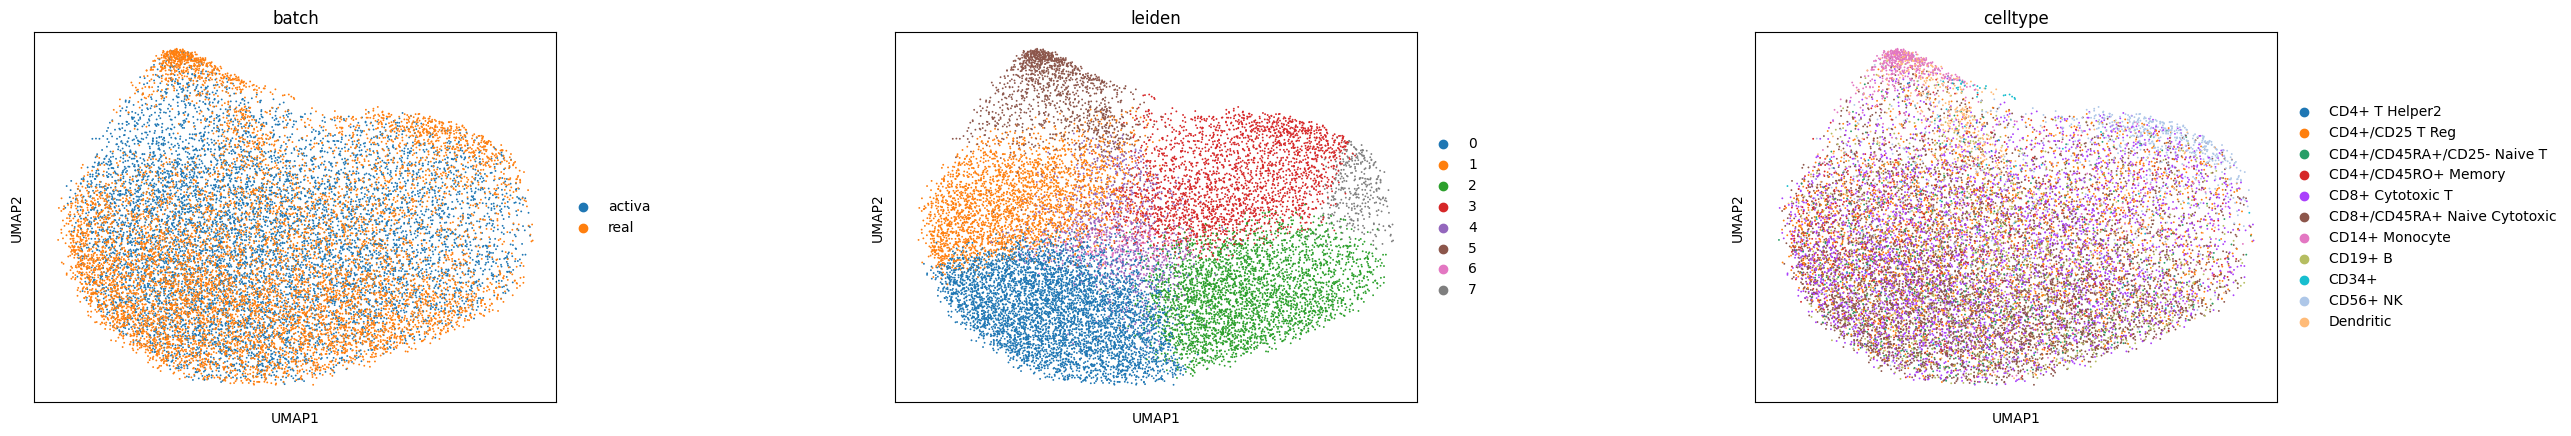

In [72]:
sc.pl.umap(real_concat, color=['batch', 'leiden', 'celltype'], wspace=0.5)

In [73]:
# Calculate UMAP
sc.tl.umap(real)
sc.tl.tsne(real)
real.obsm['X_umap'] = real.obsm['X_umap']
real.obsm['X_tsne'] = real.obsm['X_tsne']

# Save AnnData object to a file (e.g., HDF5 format)
#real.write('output.h5ad')

sc.tl.umap(activa)
sc.tl.tsne(activa)
activa.obsm['X_umap'] = activa.obsm['X_umap']
activa.obsm['X_tsne'] = activa.obsm['X_tsne']